In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

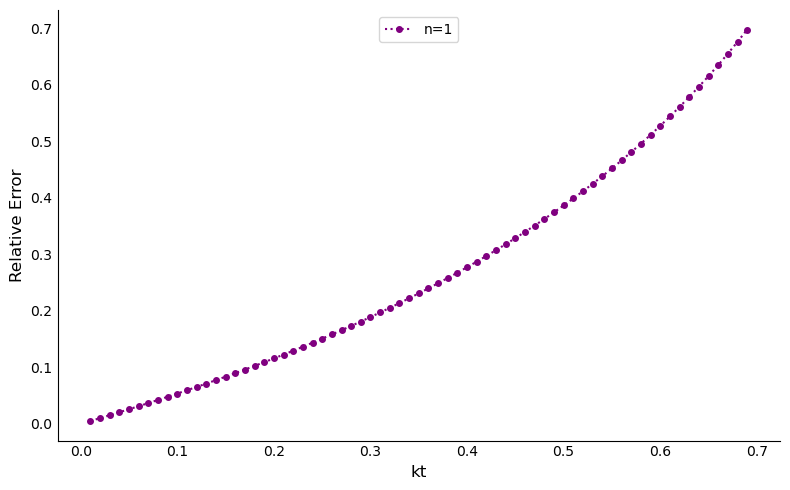

In [9]:


# Define the estimation function
def getestimation(kt):
    log_val = -np.log(1 - kt)
    x = kt
    term1 = x
    term2 = sum((x**i) / i for i in range(1, 3))
    term3 = sum((x**i) / i for i in range(1, 4))
    term10 = sum((x**i) / i for i in range(1, 11))
    term100 = sum((x**i) / i for i in range(1, 101))
    return {
        "kt": kt,
        "log_val": log_val,
        "term1": term1,
        "term2": term2,
        "term3": term3,
        "term10": term10,
        "term100": term100
    }

# Generate data
ktvals = np.arange(0.01, 0.70, 0.01)
data = [getestimation(kt) for kt in ktvals]
df = pd.DataFrame(data)

# Compute relative errors
df["n1"] = (df["log_val"] - df["term1"]) / df["kt"]
df["n2"] = (df["log_val"] - df["term2"]) / df["term2"]
df["n3"] = (df["log_val"] - df["term3"]) / df["term3"]

# Plot with Matplotlib
plt.figure(figsize=(8, 5))
plt.plot(df["kt"], df["n1"], label="n=1", color="purple", linestyle=":", marker="o", markersize=4)
# plt.plot(df["kt"], df["n2"], label="n=2", color="blue", linestyle=":", marker="o", markersize=4)
# plt.plot(df["kt"], df["n3"], label="n=3", color="green", linestyle=":", marker="o", markersize=4)

# Minimalist styling
plt.xlabel("kt", fontsize=12)
plt.ylabel("Relative Error", fontsize=12)
plt.legend(loc="upper center", fontsize=10)
plt.grid(False)
plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")
plt.tick_params(axis='both', which='both', length=0)  # remove tick marks

# Remove top/right spines for minimal look
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.savefig("simulattion.jpeg",dpi=900)
plt.show()


In [6]:
df.to_csv("SimuationResult.csv")